In [1]:
from arcgis import *
from arcgis.mapping import MapImageLayer
from arcgis.features import SpatialDataFrame

In [2]:
gis = GIS('https://deldev.maps.arcgis.com', 'deldev', '*******')

<Item title:"BPA_TransmissionStructures" type:Feature Layer Collection owner:BPA_Publish>
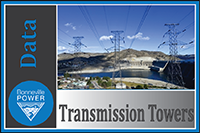

In [3]:
towers = gis.content.get('cf9f98720f2e4decade709a2ae58ee93')
towers

In [ ]:
df = towers.layers[0].query().df
df.to_featureclass(r'C:\xc\Presentations\GeoPython\GeoAI\GeoAI', 'towers.shp')

In [3]:
import pandas as pd
from pandas import DataFrame, Series, Index
import numpy as np

In [4]:
from arcgis.features import SpatialDataFrame
df = SpatialDataFrame.from_featureclass('C:\\xc\\Presentations\\GeoPython\\GeoAI\\GeoAI\\towers.shp')

In [5]:
df = df.drop_duplicates(subset='StrcSerial')
len(df)

82378

In [6]:
df.head(5)

,index,MileStrcKe,OBJECTID,OperatingL,SHAPE,StrcSerial,StrcSymbol
0,0,0/1,916798,451B-451A No 1,"{'y': 5850613.6027000025, 'x': -13287626.38980...",451B 1,B
1,1,1/1,916799,Big Eddy-McLoughlin 1&2 No 1,"{'y': 5717289.455899999, 'x': -13482378.2612}",AA 1,LTR
2,2,32/1,916800,Big Eddy-McLoughlin 1&2 No 1,"{'y': 5702998.633900002, 'x': -13549778.180599...",AA 135,LTS
4,4,32/2,916802,Big Eddy-McLoughlin 1&2 No 1,"{'y': 5702756.272600003, 'x': -13550122.1768}",AA 136,LTS
6,6,32/3,916804,Big Eddy-McLoughlin 1&2 No 1,"{'y': 5702367.2744999975, 'x': -13550525.0423}",AA 137,LTS


In [7]:
imagery = gis.content.search('title:World Imagery', 'Map Service', outside_org=True)[0]

In [ ]:
lyr = MapImageLayer.fromitem(imagery)

In [ ]:
for index, row in df[df.StrcSymbol=='LTR'].iterrows():
    imgid = row['OBJECTID']
    try:
        g = row['SHAPE']
        x, y = g['x'] - 90, g['y'] - 90

        for i in range(3):
            for j in range(2):
                x1 = x + i*60
                y1 = y + j*60
                ext = (x1, y1, x1 + 60, y1 + 60)
                if i==1 and j==1:
                    folder = 'towers'
                else:
                    folder = 'ground'
                lyr.export_map(ext, 102100, '224,224', f='image', format='jpg',
                        save_folder=folder, save_file='{}_{}.jpg'.format(row['OBJECTID'], (i+j)))

    except:
        print('Error getting {}'.format(imgid))
            

Error getting 919624
Error getting 920890
Error getting 924588
Error getting 925541
Error getting 931849
Error getting 931850
Error getting 931860
Error getting 931869
Error getting 931879
Error getting 931881
Error getting 931882
Error getting 931883
